# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [10]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [11]:
V = np.array([1,2,3])
I = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",I.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below).Important: `empty()` does not initialize array elements.

In [12]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [13]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [14]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [15]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [16]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [17]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [18]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)
print (A)
print (B)
print (D)
print (D**2)
print (D>0)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 1  3  5  7]
 [ 9 11 13 15]
 [17 19 21 23]]
[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [19]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()
print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [20]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('img/moon.png'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.jpg')

Array can be displayed as an image using Matplotlib module. Here a short example:

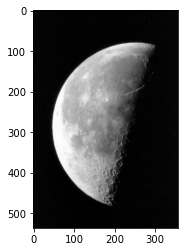

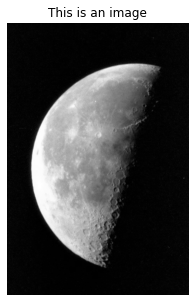

In [37]:
import matplotlib.pyplot as plt

# minimal example:
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.png`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [22]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    moon=np.array(Image.open(fname))
    return moon
print(openImage(fname))

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [23]:
def countPixels(I,k):
    """ Array*int -> int"""
    #The function calculates the number of times the value K appears in an array I
    c=np.count_nonzero(I==k)
    return c
print(countPixels(moonArr,2))
print(moonArr)

30924
[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [24]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    # I create a copy of the array I, and replace pixels with value k1 in the matrix I with new value k2
    newarr=np.copy(I)
    newarr[newarr==k1]=k2 
    return newarr

print(replacePixels(moonArr,3,0))

[[ 1  0  7 ...  8 16  8]
 [ 0  7  0 ...  4 11 12]
 [ 6  4  6 ...  7  2  0]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  0  0 ...  6  9  9]]


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [25]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    #I assign max and min values of the array I, and then normalize the values of array to the interval [k1,k2]
    maxV=np.max(I)
    minV=np.min(I)
    I=(I-minV)/(maxV-minV)*(k2-k1)+k1
    return I

print(normalizeImage(moonArr,0, 5))

[[0.01976285 0.05928854 0.13833992 ... 0.15810277 0.31620553 0.15810277]
 [0.05928854 0.13833992 0.05928854 ... 0.07905138 0.2173913  0.23715415]
 [0.11857708 0.07905138 0.11857708 ... 0.13833992 0.03952569 0.05928854]
 ...
 [0.07905138 0.15810277 0.15810277 ... 0.11857708 0.07905138 0.15810277]
 [0.07905138 0.15810277 0.15810277 ... 0.07905138 0.11857708 0.11857708]
 [0.03952569 0.05928854 0.05928854 ... 0.11857708 0.17786561 0.17786561]]


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

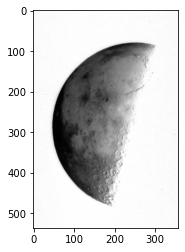

[[254 252 248 ... 247 239 247]
 [252 248 252 ... 251 244 243]
 [249 251 249 ... 248 253 252]
 ...
 [251 247 247 ... 249 251 247]
 [251 247 247 ... 251 249 249]
 [253 252 252 ... 249 246 246]]


In [26]:
def invertImage(I):
    """ Array -> Array """
    #I invert the values of array I
    I=(255-I)
    plt.imshow(I)
    plt.plot()
    plt.show()
    return(I)

print(invertImage(moonArr))

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [27]:
def computeHistogram(I):
    """ Array -> list[int] """
    #Here I inintialize new array of histogram, and using the previous countPixels function i count how many times each 
    #appeared in the array. And, yes we can compute histogram the other way, by using numpy unique method.
    histogram=[]
    np.sort(I)
    for i in range(256):
        histogram.append(countPixels(I,i))
    return histogram
print(computeHistogram(moonArr))
# use comments to answer to a verbal question

[1459, 20126, 30924, 25408, 17167, 11368, 7369, 4767, 3213, 2178, 1486, 993, 632, 488, 371, 301, 255, 217, 201, 202, 190, 165, 168, 140, 160, 157, 129, 136, 140, 135, 137, 121, 137, 114, 127, 129, 115, 132, 123, 124, 101, 91, 122, 116, 129, 109, 108, 116, 113, 123, 109, 140, 101, 109, 114, 117, 140, 127, 140, 142, 129, 134, 192, 160, 179, 165, 170, 154, 155, 159, 164, 184, 166, 180, 169, 132, 153, 171, 165, 156, 166, 142, 151, 179, 159, 154, 167, 166, 179, 163, 195, 198, 181, 216, 230, 231, 250, 256, 264, 291, 245, 242, 279, 247, 261, 304, 287, 286, 296, 286, 292, 296, 285, 312, 274, 312, 282, 308, 296, 267, 273, 304, 327, 263, 286, 282, 272, 246, 238, 227, 243, 225, 239, 233, 242, 248, 258, 262, 263, 309, 338, 336, 324, 318, 335, 326, 327, 316, 314, 293, 313, 328, 292, 300, 296, 326, 341, 312, 336, 326, 362, 357, 384, 382, 414, 442, 420, 483, 448, 499, 448, 499, 468, 486, 498, 519, 551, 524, 543, 544, 527, 504, 497, 519, 521, 539, 538, 501, 536, 550, 503, 514, 557, 541, 480, 495, 484,

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [28]:
def thresholdImage(I,s):
    #The function returns 0 if values in array is less that 0
    """ Array*int -> Array """
    I[I<s]=0
    return I
print(thresholdImage(moonArr,4))

[[ 0  0  7 ...  8 16  8]
 [ 0  7  0 ...  4 11 12]
 [ 6  4  6 ...  7  0  0]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 0  0  0 ...  6  9  9]]


8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

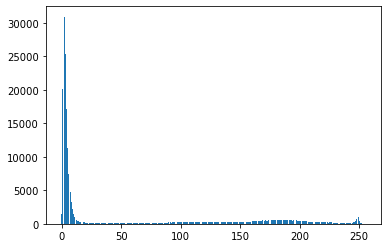

In [29]:
import matplotlib.pyplot as plt

## your code start below
fname='img/moon.png'
moonArr=openImage(fname)
#plotting the histogram
plt.bar(np.arange(0,256),computeHistogram(moonArr))
plt.plot()
plt.show()


9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

[1459, 20126, 30924, 25408, 17167, 11368, 7369, 4767, 3213, 2178, 1486, 993, 632, 488, 371, 301, 255, 217, 201, 202, 190, 165, 168, 140, 160, 157, 129, 136, 140, 135, 137, 121, 137, 114, 127, 129, 115, 132, 123, 124, 101, 91, 122, 116, 129, 109, 108, 116, 113, 123, 109, 140, 101, 109, 114, 117, 140, 127, 140, 142, 129, 134, 192, 160, 179, 165, 170, 154, 155, 159, 164, 184, 166, 180, 169, 132, 153, 171, 165, 156, 166, 142, 151, 179, 159, 154, 167, 166, 179, 163, 195, 198, 181, 216, 230, 231, 250, 256, 264, 291, 245, 242, 279, 247, 261, 304, 287, 286, 296, 286, 292, 296, 285, 312, 274, 312, 282, 308, 296, 267, 273, 304, 327, 263, 286, 282, 272, 246, 238, 227, 243, 225, 239, 233, 242, 248, 258, 262, 263, 309, 338, 336, 324, 318, 335, 326, 327, 316, 314, 293, 313, 328, 292, 300, 296, 326, 341, 312, 336, 326, 362, 357, 384, 382, 414, 442, 420, 483, 448, 499, 448, 499, 468, 486, 498, 519, 551, 524, 543, 544, 527, 504, 497, 519, 521, 539, 538, 501, 536, 550, 503, 514, 557, 541, 480, 495, 484,

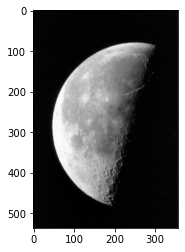

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 113821, 13269, 1833, 1182, 798, 754, 806, 678, 721, 1024, 982, 995, 1104, 1004, 1183, 1779, 1664, 1767, 2012, 1734, 1418, 1815, 1977, 1891, 2203, 2225, 2740, 3545, 3134, 3185, 3574, 2726, 2139, 1912, 1327, 1265, 1123, 918, 1126, 2858, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


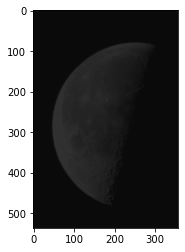

In [30]:
fname='img/moon.png'
moonArr=openImage(fname)
print(computeHistogram(moonArr))
plt.imshow(moonArr, vmin = 0 , vmax = 255)
plt.plot()
plt.show()

moonArr=normalizeImage(moonArr,10,50).astype(np.uint8)
print(computeHistogram(moonArr))

plt.imshow(moonArr, vmin = 0 , vmax = 255)
plt.plot()
plt.show()
#After the normalization, as the values of the array are set to the interval of [10,50], the values are closer to 0 and that's 
#why the image appears darker. And we can see in the histogram, that the values before 10 and after 50 are 0.

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

[1459, 20126, 30924, 25408, 17167, 11368, 7369, 4767, 3213, 2178, 1486, 993, 632, 488, 371, 301, 255, 217, 201, 202, 190, 165, 168, 140, 160, 157, 129, 136, 140, 135, 137, 121, 137, 114, 127, 129, 115, 132, 123, 124, 101, 91, 122, 116, 129, 109, 108, 116, 113, 123, 109, 140, 101, 109, 114, 117, 140, 127, 140, 142, 129, 134, 192, 160, 179, 165, 170, 154, 155, 159, 164, 184, 166, 180, 169, 132, 153, 171, 165, 156, 166, 142, 151, 179, 159, 154, 167, 166, 179, 163, 195, 198, 181, 216, 230, 231, 250, 256, 264, 291, 245, 242, 279, 247, 261, 304, 287, 286, 296, 286, 292, 296, 285, 312, 274, 312, 282, 308, 296, 267, 273, 304, 327, 263, 286, 282, 272, 246, 238, 227, 243, 225, 239, 233, 242, 248, 258, 262, 263, 309, 338, 336, 324, 318, 335, 326, 327, 316, 314, 293, 313, 328, 292, 300, 296, 326, 341, 312, 336, 326, 362, 357, 384, 382, 414, 442, 420, 483, 448, 499, 448, 499, 468, 486, 498, 519, 551, 524, 543, 544, 527, 504, 497, 519, 521, 539, 538, 501, 536, 550, 503, 514, 557, 541, 480, 495, 484,

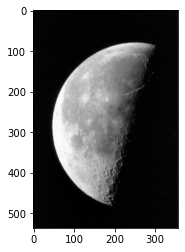

[149110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246, 238, 227, 243, 225, 239, 233, 242, 248, 258, 262, 263, 309, 338, 336, 324, 318, 335, 326, 327, 316, 314, 293, 313, 328, 292, 300, 296, 326, 341, 312, 336, 326, 362, 357, 384, 382, 414, 442, 420, 483, 448, 499, 448, 499, 468, 486, 498, 519, 551, 524, 543, 544, 527, 504, 497, 519, 521, 539, 538, 501, 536, 550, 503, 514, 557, 541, 480, 495, 484, 510, 447, 453, 427, 457, 432, 382, 361, 393, 355, 315, 333, 329, 268, 308, 259, 253, 261, 234, 221, 218, 205, 223, 254, 206, 236, 204, 191, 219, 212, 203, 178, 179, 147, 148, 148, 160, 163, 155, 168, 162, 174, 118, 141, 142, 129, 143, 175, 255, 282, 451, 731, 970

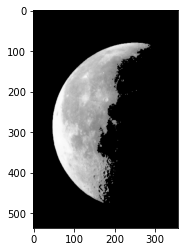

In [42]:
fname='img/moon.png'
moonArr=openImage(fname)
print(computeHistogram(moonArr))
plt.imshow(moonArr, vmin = 0 , vmax = 255)
plt.plot()
plt.show()
#Here instead of normalization, i use threshold function
moonArr=thresholdImage(moonArr,127)
print(computeHistogram(moonArr))

plt.imshow(moonArr, vmin = 0 , vmax = 255)
plt.plot()
plt.show()


## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 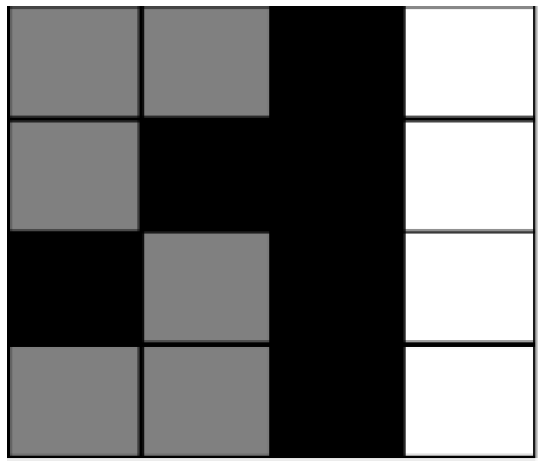 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

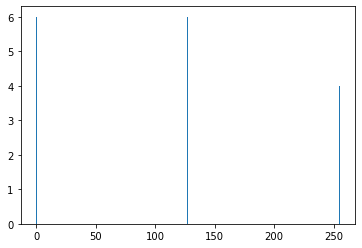

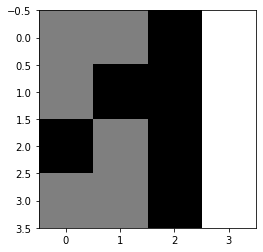

In [50]:
#manually assign the values to the array and then print the histogram and the image
I=np.array([[127,127,0,255],[127,0,0,255],[0,127,0,255],[127,127,0,255]])
plt.bar(np.arange(0,256),computeHistogram(I))
plt.plot()
plt.show()
plt.imshow(I)
plt.plot()
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

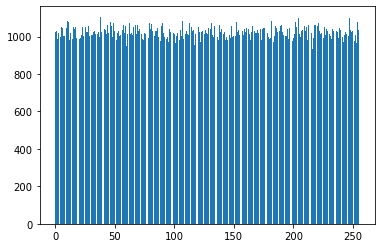

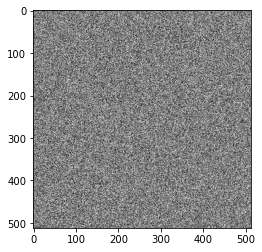

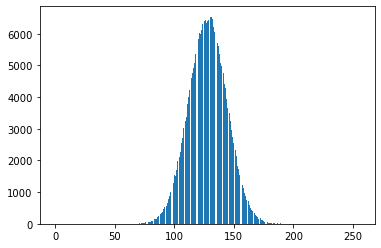

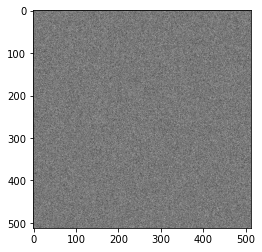

In [52]:
import numpy.matlib
#I created an array with rand values of 512,512 shape, multiplied each value by 256 and cast it to uint8 type 
#Then using around function rounded it to the nearest int value
a=np.array(np.random.rand(512,512))
a=a*256
a=np.around(a).astype(np.uint8)
plt.bar(np.arange(0,256),computeHistogram(a))
plt.plot()
plt.show()
plt.imshow(a)
plt.plot()
plt.show()

#I created the array with randn function to assign values by normal distribution with the shape 512,512. Then i multiplied each
#valur by 16 qand added 128. Then using around function rounded it to the nearest int value
b=np.array(np.random.randn(512,512))
b=b*16+128
b=np.around(b).astype(np.uint8)
plt.bar(np.arange(0,256),computeHistogram(b))
plt.plot()
plt.show()
plt.imshow(b)
plt.plot()
plt.show()



## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

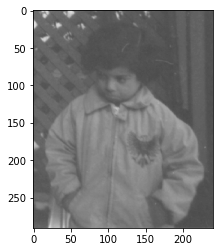

In [34]:
fname='img/pout.png'
poutArr=openImage(fname)
plt.imshow(poutArr,vmin=0,vmax=255)
plt.plot()
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

In [35]:
hist=computeHistogram(poutArr)
extrema=np.amax(hist)
print(extrema)

3628


3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

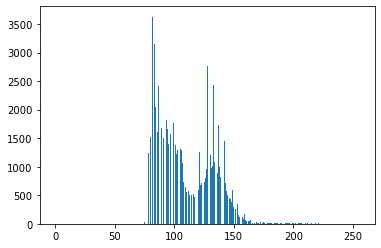

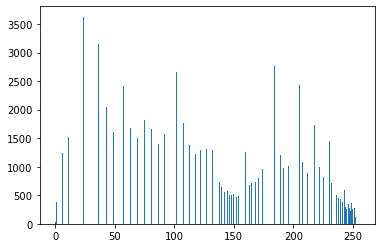

[[107 108 107 ...  84  83  83]
 [109 106 108 ...  84  84  86]
 [107 106 110 ...  84  83  83]
 ...
 [ 97  99 101 ...  82  82  83]
 [ 99  98  98 ...  84  84  86]
 [101  99  99 ...  97  97  97]]


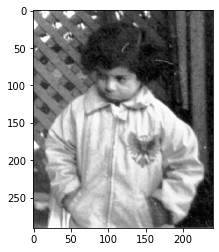

In [54]:
#the function to compute the cumulative histogram of an image
def computeCumHist(I):
    histogram=[]
    np.sort(I)
    for i in range(256):
        if(i==0):
            histogram.append(countPixels(I,i))
        else:
            histogram.append(countPixels(I,i)+histogram[i-1])
    return histogram

def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    h=np.array(computeHistogram(I))
    hc=np.array(computeCumHist(I))
    plt.bar(np.arange(0,256),h)
    plt.plot()
    plt.show()
    eqI=((255*hc[I])/(294*240)).astype(np.uint8)
    eqh=computeHistogram(eqI)
    plt.bar(np.arange(0,256),eqh)
    plt.plot()
    plt.show()
    print(I)
    plt.imshow(eqI,vmin=0,vmax=255)
    plt.plot()
    plt.show()

histogramEqualization(poutArr,computeHistogram(poutArr))

#In the result, after applying the histogram equalization to the function, the image became more sharp, i.e more detailed. That
#happened due to equalizing the values of histogram